In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv("f.csv")

In [26]:
df

,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,ts1,st2,ts2,grip,water,snow,ice,vis
0,92,66789712,2021-04-28 00:00:00.000000,0.8,100.0,0.8,0.6,262.0,NaN,NaN,NaN,NaN,0.81,0.07,0.0,0.0,2000.0
1,72,69846131,2021-04-28 08:54:00.000000,13.7,25.0,-6.3,2.6,225.0,NaN,26.3,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
2,73,69846132,2021-04-28 08:54:00.000000,13.2,24.0,-7.1,1.6,338.0,NaN,25.7,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
3,82,69846137,2021-04-28 08:55:00.000000,13.7,24.0,-6.3,2.4,232.0,NaN,23.6,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
4,53,69846186,2021-04-28 08:55:00.000000,13.1,23.3,-7.4,1.1,155.0,NaN,23.5,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372568,38,77802865,2022-02-28 23:56:00.000000,-5.0,76.5,-8.5,0.3,89.0,1.0,-3.4,NaN,NaN,0.82,0.00,0.0,0.0,NaN
3372569,73,77802878,2022-02-28 23:58:00.000000,-2.8,62.0,-9.1,1.0,161.0,1.0,-2.9,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
3372570,82,77802873,2022-02-28 23:58:00.000000,-0.5,54.0,-8.7,3.2,61.0,1.0,-2.1,NaN,NaN,0.82,0.00,0.0,0.0,2000.0
3372571,72,77802871,2022-02-28 23:58:00.000000,-0.5,54.0,-8.7,3.2,61.0,1.0,-1.8,NaN,NaN,0.82,0.00,0.0,0.0,2000.0


In [5]:
len(df)

3372573

In [27]:
# odstranime hodnoty kde zakladne meteo udaje niesu merane (temp,rh,td)
df_clean = df[(df["temp"].notna()) & (df["rh"].notna()) & (df["td"].notna())]
len(df_clean)

3328216

In [28]:
# odstranime take merania ktore pri cestnom senzore chyba 1 z hodnot (st[1,2] != nan & ts[1,2] != nan)
df_clean = df_clean[
    ((df_clean["st1"].notna()) & (df["ts1"].notna())) | ((df_clean["st2"].notna()) & (df["ts2"].notna()))]
# df_clean = df_clean[(df_clean["st2"].notna()) & (df["ts2"].notna())]
len(df_clean)

/tmp/ipykernel_8646/2689807324.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[


2458835

In [29]:
# odstranime take merania ktore nemaju udaj o gripe
df_clean = df_clean[(df_clean["grip"].notna())]
len(df_clean)

1889362

In [9]:
#dropneme prazdny stlpec st2
df_clean["st2"].value_counts()

Series([], Name: st2, dtype: int64)

In [10]:
#dropneme prazdny stlpec ts2
df_clean["ts2"].value_counts()

Series([], Name: ts2, dtype: int64)

In [30]:
df_clean = df_clean.drop(columns=["st2", "ts2"])


In [31]:
# zrusime stnaice ktore niesu cely rok
df_clean = df_clean[(df_clean["station_id"] != 1) & (df_clean["station_id"] != 38)]
len(df_clean)


1642398

In [12]:
df_clean['station_id'].value_counts()

82    343076
73    342994
72    342853
50    204779
53    204554
54    204142
Name: station_id, dtype: int64

In [32]:

# zmazeme 4 zaznamy ktore nemaju vis (vsetky nan okrem ws,wd)
df_clean = df_clean.drop(df_clean[df_clean.drop(columns=['ws', 'wd']).isna().any(axis=1)].index)
len(df_clean)

# len(df_clean.dropna())

1642394

In [33]:
# vytvorime timestamp z merania
df_clean['mes_datetime'] = df_clean['mes_datetime'].apply(lambda x: x[:-7])

df_clean['timestamp'] = df_clean['mes_datetime'].apply(lambda x: pd.Timestamp(x).value)

In [34]:
df_clean = df_clean.groupby("timestamp").head(1)
df_clean['station_id'].value_counts()

82    50967
72    43622
73    42592
50    33276
54    33126
53    25116
Name: station_id, dtype: int64

In [35]:

aa = df_clean.st1.apply(lambda x: pd.Series(list(str(int(x)).zfill(3))).astype(int))
aa

,0,1,2
16896,0,0,1
16920,0,0,1
16930,0,0,1
16932,0,0,1
16956,0,0,1
...,...,...,...
3372501,0,0,1
3372528,0,0,1
3372533,0,0,1
3372559,1,0,1


In [36]:
df_clean = pd.concat([df_clean, aa], axis=1, join="inner")
df_clean = df_clean.rename(columns={0: "warning", 1: "rain", 2: "surface_state"})


In [24]:
df_clean

,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,ts1,...,rain,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_7,surface_state_9
16896,72,69959032,2021-05-02 22:09:00,9.1,67.0,3.4,5.7,262.0,1.0,10.7,...,0,1,0,1,0,0,0,0,0,0
16920,50,69959104,2021-05-02 22:10:00,8.9,68.4,3.4,3.2,149.0,1.0,10.1,...,0,1,0,1,0,0,0,0,0,0
16930,73,69959113,2021-05-02 22:12:00,8.6,69.0,3.3,2.0,26.0,1.0,11.0,...,0,1,0,1,0,0,0,0,0,0
16932,82,69959114,2021-05-02 22:13:00,9.1,67.0,3.3,5.4,261.0,1.0,9.9,...,0,1,0,1,0,0,0,0,0,0
16956,54,69959189,2021-05-02 22:15:00,8.1,66.1,2.2,3.6,307.0,1.0,10.8,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372501,82,77802691,2022-02-28 23:49:00,-0.6,55.0,-8.5,1.9,63.0,1.0,-2.1,...,0,1,0,1,0,0,0,0,0,0
3372528,54,77802770,2022-02-28 23:50:00,-2.3,65.7,-7.9,2.8,20.0,1.0,-2.6,...,0,1,0,1,0,0,0,0,0,0
3372533,72,77802779,2022-02-28 23:52:00,-0.6,54.0,-8.7,2.5,58.0,1.0,-1.6,...,0,1,0,1,0,0,0,0,0,0
3372559,50,77802868,2022-02-28 23:55:00,-2.3,64.6,-8.1,1.6,317.0,101.0,-2.0,...,0,1,0,1,0,0,0,0,0,0


In [37]:
dumm = pd.get_dummies(df_clean.surface_state, prefix='surface_state')
dumm

,surface_state_0,surface_state_1,surface_state_2,surface_state_3,surface_state_5,surface_state_6,surface_state_7,surface_state_9
16896,0,1,0,0,0,0,0,0
16920,0,1,0,0,0,0,0,0
16930,0,1,0,0,0,0,0,0
16932,0,1,0,0,0,0,0,0
16956,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3372501,0,1,0,0,0,0,0,0
3372528,0,1,0,0,0,0,0,0
3372533,0,1,0,0,0,0,0,0
3372559,0,1,0,0,0,0,0,0


In [38]:
df_clean = pd.concat([df_clean, dumm], axis=1)
df_clean

,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,ts1,...,rain,surface_state,surface_state_0,surface_state_1,surface_state_2,surface_state_3,surface_state_5,surface_state_6,surface_state_7,surface_state_9
16896,72,69959032,2021-05-02 22:09:00,9.1,67.0,3.4,5.7,262.0,1.0,10.7,...,0,1,0,1,0,0,0,0,0,0
16920,50,69959104,2021-05-02 22:10:00,8.9,68.4,3.4,3.2,149.0,1.0,10.1,...,0,1,0,1,0,0,0,0,0,0
16930,73,69959113,2021-05-02 22:12:00,8.6,69.0,3.3,2.0,26.0,1.0,11.0,...,0,1,0,1,0,0,0,0,0,0
16932,82,69959114,2021-05-02 22:13:00,9.1,67.0,3.3,5.4,261.0,1.0,9.9,...,0,1,0,1,0,0,0,0,0,0
16956,54,69959189,2021-05-02 22:15:00,8.1,66.1,2.2,3.6,307.0,1.0,10.8,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372501,82,77802691,2022-02-28 23:49:00,-0.6,55.0,-8.5,1.9,63.0,1.0,-2.1,...,0,1,0,1,0,0,0,0,0,0
3372528,54,77802770,2022-02-28 23:50:00,-2.3,65.7,-7.9,2.8,20.0,1.0,-2.6,...,0,1,0,1,0,0,0,0,0,0
3372533,72,77802779,2022-02-28 23:52:00,-0.6,54.0,-8.7,2.5,58.0,1.0,-1.6,...,0,1,0,1,0,0,0,0,0,0
3372559,50,77802868,2022-02-28 23:55:00,-2.3,64.6,-8.1,1.6,317.0,101.0,-2.0,...,0,1,0,1,0,0,0,0,0,0


In [39]:

df_clean = df_clean.rename(columns={
    "surface_state_0": "surface_state_error",
    "surface_state_1": "surface_state_dry",
    "surface_state_2": "surface_state_moist",
    "surface_state_3": "surface_state_wet",
    "surface_state_4": "surface_state_wet_chemical",
    "surface_state_5": "surface_state_frosty",
    "surface_state_6": "surface_state_snowy",
    "surface_state_7": "surface_state_icy",
    "surface_state_8": "surface_state_moist_chemical"
})


In [41]:
df_clean[df_clean.surface_state_9 !=0]

,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,ts1,...,rain,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_icy,surface_state_9
962704,50,72236359,2021-07-31 03:30:00,18.1,89.5,16.4,1.0,50.0,9.0,20.4,...,0,9,0,0,0,0,0,0,0,1
1763150,50,73967414,2021-10-06 20:45:00,10.8,89.7,9.2,0.7,224.0,9.0,11.5,...,0,9,0,0,0,0,0,0,0,1
2081968,50,74651963,2021-11-02 02:35:00,9.0,86.7,6.9,3.2,259.0,9.0,9.3,...,0,9,0,0,0,0,0,0,0,1
2085095,50,74658767,2021-11-02 08:40:00,8.6,88.5,6.8,1.3,122.0,9.0,9.1,...,0,9,0,0,0,0,0,0,0,1
2387633,50,75322179,2021-11-26 21:50:00,1.6,85.0,-0.6,2.6,57.0,9.0,2.7,...,0,9,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365186,53,77783662,2022-02-28 06:10:00,-3.8,81.9,-6.5,3.4,37.0,9.0,-3.2,...,0,9,0,0,0,0,0,0,0,1
3365260,53,77783836,2022-02-28 06:20:00,-3.9,81.3,-6.6,3.2,35.0,9.0,-3.1,...,0,9,0,0,0,0,0,0,0,1
3365394,53,77784190,2022-02-28 06:40:00,-3.6,77.7,-6.9,3.6,36.0,9.0,-2.9,...,0,9,0,0,0,0,0,0,0,1
3365430,53,77784276,2022-02-28 06:45:00,-3.5,77.0,-7.0,3.6,36.0,9.0,-3.0,...,0,9,0,0,0,0,0,0,0,1


In [21]:
df_clean.groupby("timestamp").count()

,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,ts1,...,rain,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_7,surface_state_9
timestamp,,,,,,,,,,,,,,,,,,,,,
1619993340000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1619993400000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1619993520000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1619993580000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1619993700000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646092140000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1646092200000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1646092320000000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df[(df["st1"] != df['st2']) & (df["ts2"].notna()) & (df["ts1"].notna())]

In [ ]:
df_clean.describe()

# df[['temp']].max()

In [ ]:
df['station_id'].value_counts()
df['vis'].value_counts(dropna=False)

In [ ]:
df['mes_datetime'].value_counts()

/tmp/ipykernel_8646/1975899188.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


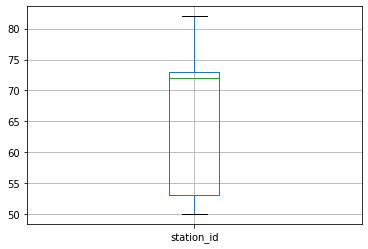

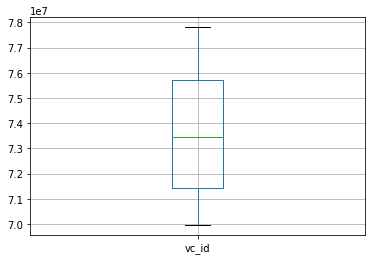

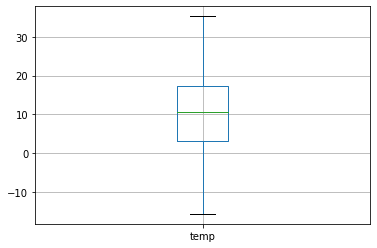

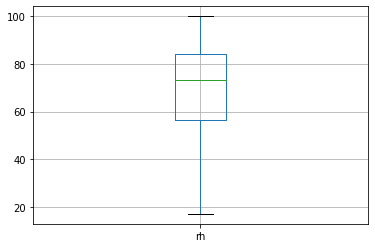

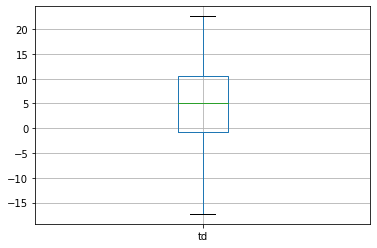

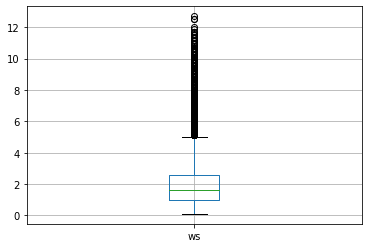

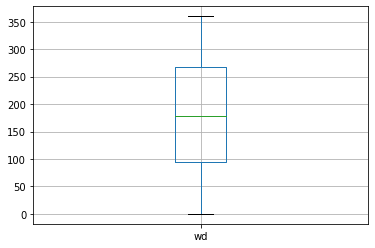

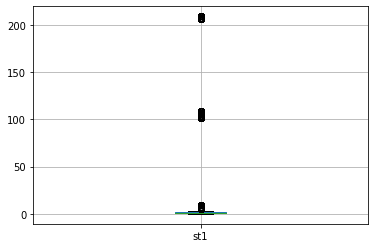

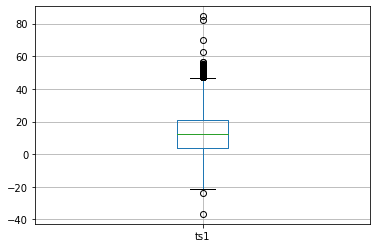

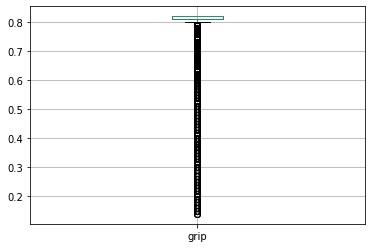

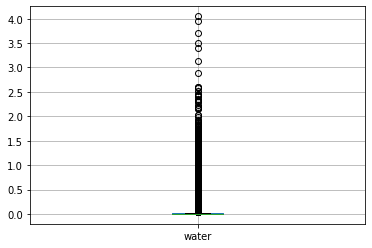

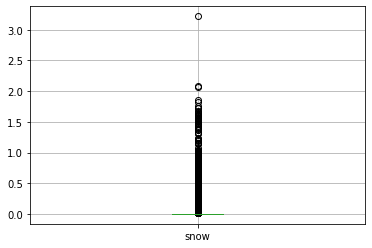

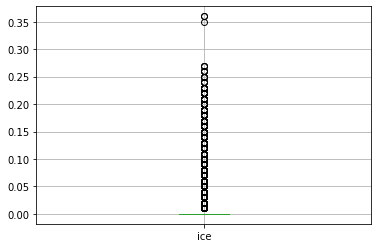

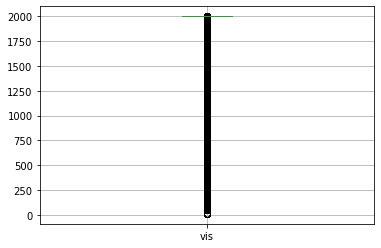

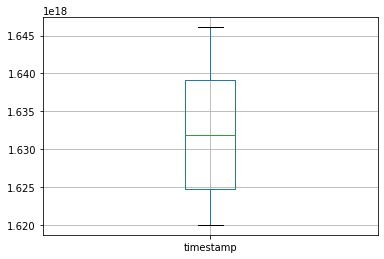

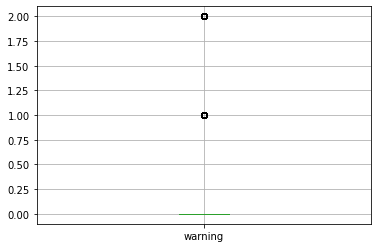

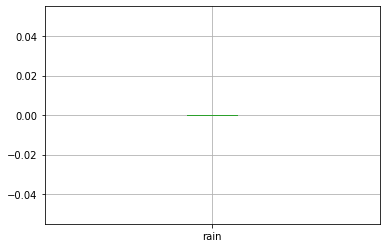

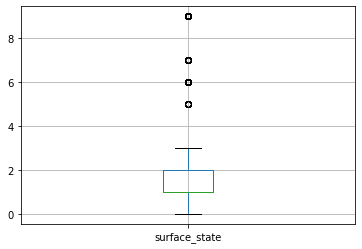

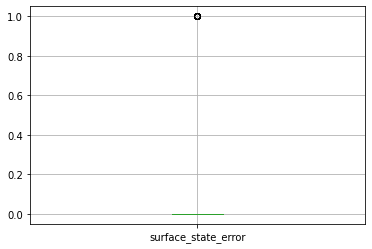

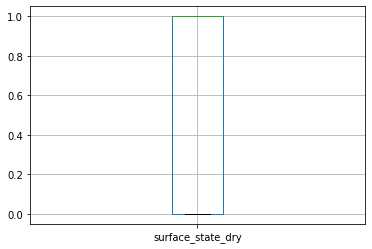

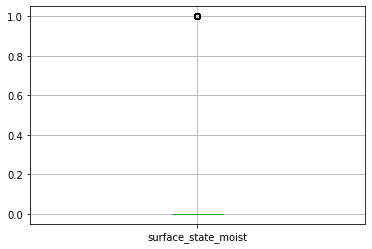

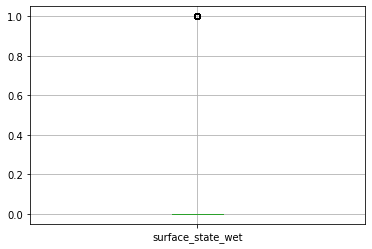

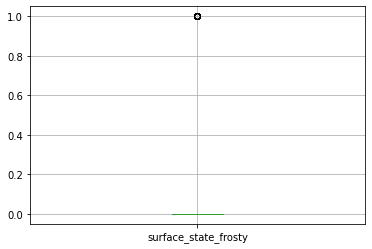

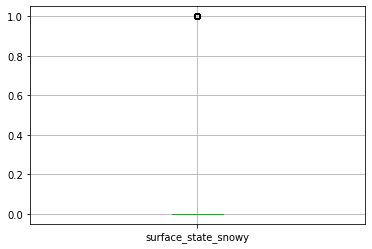

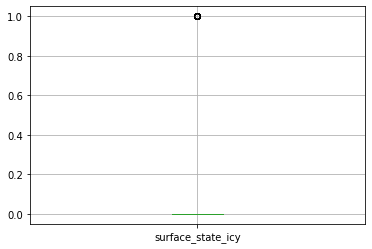

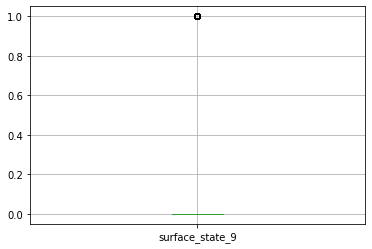

In [44]:
# df.boxplot(column=["temp"])
# df.boxplot()
for column in df_clean:
    if column != "mes_datetime":
        plt.figure()
        df_clean.boxplot([column])

In [ ]:
df[(df["vis"] < 2000)]["vis"].plot.hist()
print(len(df))
df_lim_vis = df[(df["vis"] < 2000)]
print(len(df_lim_vis))


In [ ]:
df_lim_vis.head()

In [ ]:
# for column in df_lim_vis:
#     if column != "mes_datetime":
#         plt.figure()
#         df.boxplot([column])

In [ ]:
df_clean = df_clean.drop(columns=["warning", "rain", "surface_state"])

In [22]:
df_clean["surface_state"].value_counts()

1    167485
3     38438
2     20171
9      1369
6      1170
7        39
0        14
5        13
Name: surface_state, dtype: int64

<AxesSubplot:>

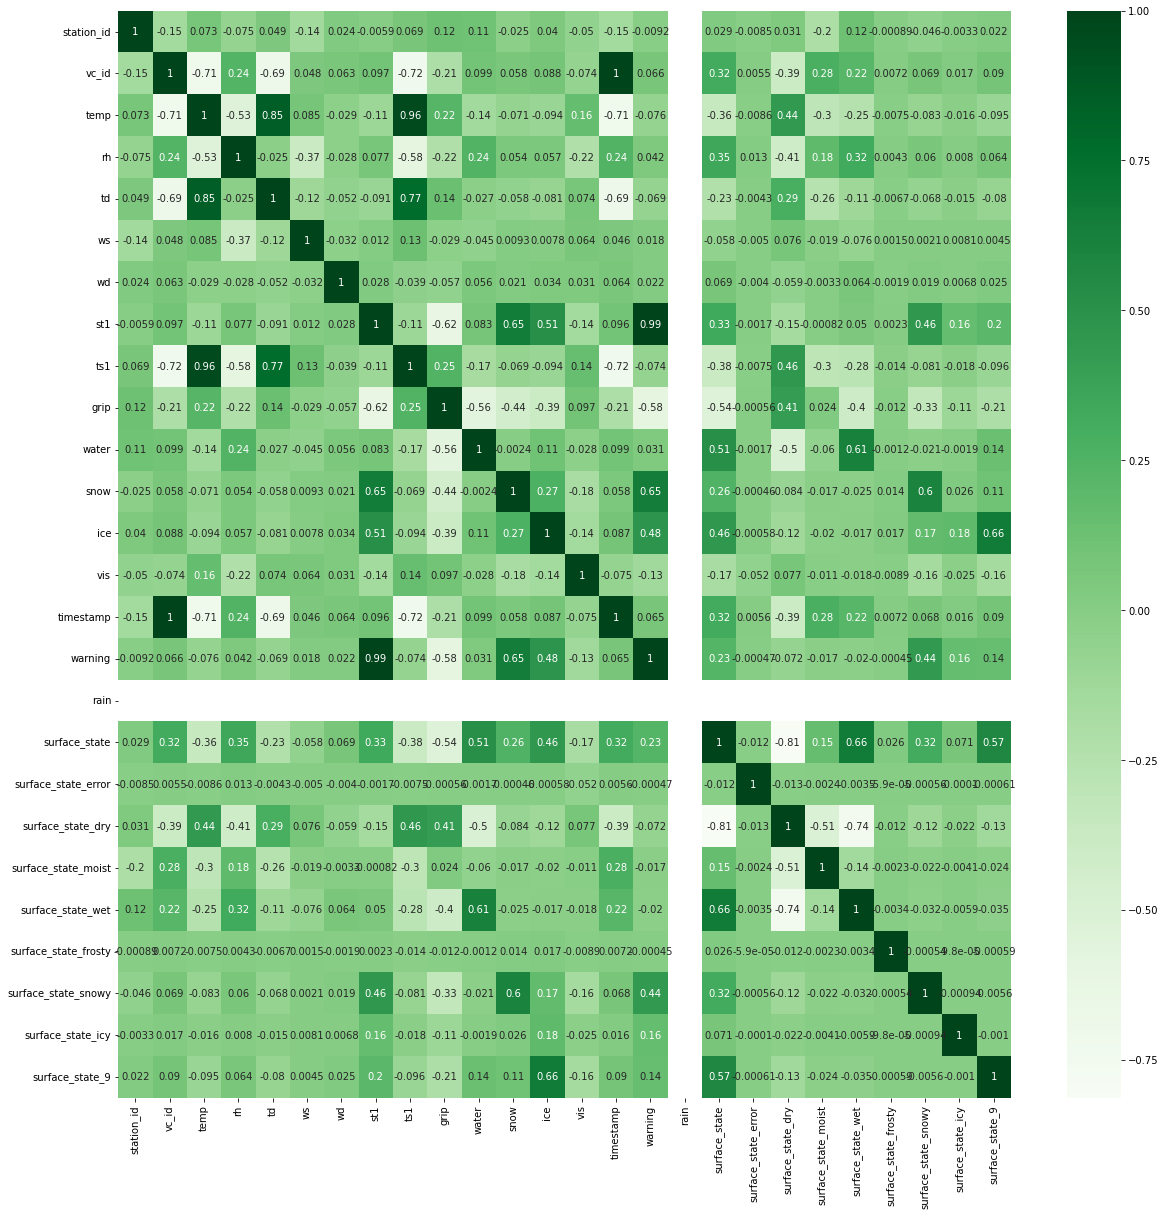

In [43]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_clean.corr(), cmap="Greens", annot=True, ax=ax)
# sns.heatmap(df_lim_vis.corr(),annot=True,ax=ax)

In [1]:
# for col in df_clean.columns:
#     for col2 in df_clean.columns:
#         if (col != "mes_datetime"):
#             if (col2 != "mes_datetime"):
#                 print(f'{col} {col2}')
#                 z = df_clean.plot.scatter(col,col2)
#                 plt.show()
df_clean

NameError: name 'df_clean' is not defined

In [ ]:

sns.set_theme(style="ticks")

sns.pairplot(df_clean)
